# Definición de parámetros
- **N**: Se genera un número aleatorio entre 2 y 10, que representa el número de "centroides" o grupos (clústeres) que se van a generar.
- **n_samples**: Es el número total de puntos (datos) que vamos a generar. Aquí decidimos generar 2,000 puntos.
- **dim**: Define que los puntos serán en 2 dimensiones (2D), para que podamos visualizarlos en un gráfico de dispersión.
- **min_distance**: Es la distancia mínima que debe haber entre los centroides para que los grupos no queden muy cerca unos de otros.
- **cluster_spread**: Controla la dispersión (o ruido) alrededor de cada centroide. Cuanto menor sea este valor, más cerca estarán los puntos de su centroide.

# Función para generar los centroides
- **generate_centroids**: Esta función genera los puntos centrales (centroides) de los grupos.
    - `while len(centroids) < N`: Sigue generando centroides hasta que tengamos N centroides (el número que generamos aleatoriamente al principio).
    - `new_centroid = np.random.uniform(-30, 30, size=(1, dim))`: Genera un nuevo centroide aleatorio en un espacio de (-30, 30) en ambas dimensiones.
    - **cdist**: Calcula la distancia entre el nuevo centroide y los centroides ya generados.
    - `np.all(distances > min_distance)`: Comprueba que la distancia entre el nuevo centroide y los ya existentes sea mayor que min_distance. Si es así, el nuevo centroide es añadido a la lista.
    - `np.vstack(centroids)`: Combina todos los centroides generados en una matriz.

# Crear los puntos de datos alrededor de los centroides
- `for i, centroid in enumerate(centroids)`: Recorremos cada centroide generado.
    - `points = centroid + np.random.randn(n_samples // N, dim) * cluster_spread`:
        - `np.random.randn(n_samples // N, dim)`: Genera puntos aleatorios alrededor del centroide. El número de puntos generados para cada grupo es `n_samples / N`, para que los puntos se distribuyan uniformemente entre los grupos.
        - `* cluster_spread`: Ajusta la dispersión de los puntos alrededor del centroide.
    - `X.append(points)`: Añade estos puntos generados a la lista de todos los puntos.
    - `y.append([i] * (n_samples // N))`: Asigna una etiqueta a cada punto, identificando a qué centroide pertenece. `i` es el número de clúster al que pertenece el punto.

# Convertir las listas en arrays de NumPy
- `np.vstack(X)`: Combina todas las listas de puntos en un solo array.
- `np.hstack(y)`: Combina todas las etiquetas en un solo array.


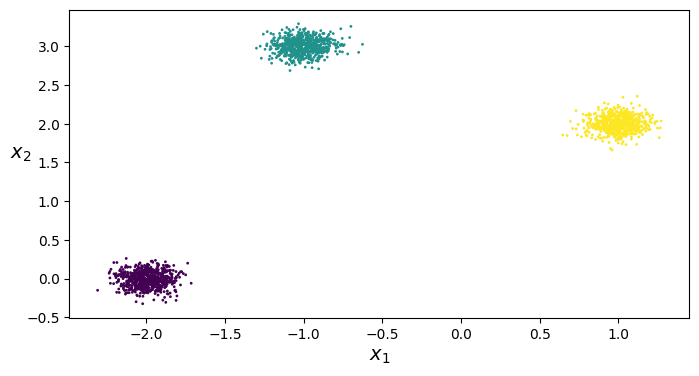

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from sklearn.datasets import make_blobs


# Función para generar centros de clusters aleatorios
# se envian valores minimos y maximos de X, Y para generar los centroides y para que mantengan una distancia
# considerada trabajaremos con valores enteros
def generar_centroides(n_centroides, x_min=-3, x_max=3, y_min=0, y_max=5):

    x_coords = np.random.randint(x_min, x_max, n_centroides) #Coordenadas de X
    y_coords = np.random.randint(y_min, y_max, n_centroides) #Coordenadas de y
    centroides = np.column_stack((x_coords, y_coords)) #une los dos arrays en una sola bidimencional
    return centroides

# Número de centroides entre 2 y 10
N = np.random.randint(2, 11)

# Generar los centroides con restricciones en X (-3 a 3) y en Y (0 a 5)
blob_centers = generar_centroides(N)

# Desviaciones estándar para cada cluster (manteniendo el valor de 0.1 para todos)
blob_std = np.full(N, 0.1)

#make_blobs genera un dataset(es decir valores de X y Y) controlado con (numero de ejemplos, dispercion al rededor de los centroides)
X, y = make_blobs(n_samples=2000, centers=blob_centers,  #en cluster_std se especifica la dispersión (o spread)
                  cluster_std=blob_std, random_state=7)

# Función para graficar los clusters
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap='viridis')
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X, y)
plt.show()

# Importación del módulo KMeans
- **KMeans**: Es una técnica de agrupación de datos que viene de la biblioteca scikit-learn.
  - El algoritmo de K-Means busca dividir los datos en grupos o "clusters" basados en las similitudes entre ellos.
  - Cada grupo tiene un centro (llamado "centroide"), y el algoritmo trata de asignar cada punto al grupo cuyo centro está más cercano.

# Definir el número de clusters
- **k**: Esta variable indica el número de clusters que quieres generar.
  - Aquí, el valor de k es igual a N, que fue generado previamente en el código anterior como un número aleatorio entre 2 y 10.
  - Esto significa que el algoritmo K-Means creará N clusters.

# Inicializar el modelo de K-Means
- **kmeans = KMeans(n_clusters=k, random_state=42)**:
  - Aquí estamos creando una instancia del modelo K-Means, indicando cuántos clusters queremos crear con el parámetro `n_clusters=k`.
  - `n_clusters=k`: El número de clusters que queremos que el algoritmo busque es k, que fue definido en el paso anterior.
  - `random_state=42`: Este parámetro asegura que los resultados sean reproducibles. Al establecer un valor de `random_state`, garantizamos que el algoritmo de K-Means siempre generará los mismos valores aleatorios cuando se ejecute en los mismos datos.

# Ajustar el modelo a los datos y hacer predicciones
- **y_pred = kmeans.fit_predict(X)**: Este comando realiza dos acciones:
  - `fit(X)`: Ajusta el modelo K-Means a los datos en X. Básicamente, el algoritmo busca los mejores centroides para dividir los datos en k clusters.
  - `predict(X)`: Asigna cada punto de los datos a uno de los clusters creados. Cada punto será asignado al centroide más cercano.
  - **X**: Es el conjunto de datos que contiene los puntos generados en el código anterior.
  - **y_pred**: Es un array donde cada valor corresponde a un cluster (grupo) al que pertenece cada punto. Por ejemplo, si un punto pertenece al cluster 0, en y_pred habrá un 0 en la posición correspondiente a ese punto.

# Obtener los centroides de los clusters
- **kmeans.cluster_centers_**: Este atributo contiene las coordenadas de los "centros" de cada uno de los clusters.
  - Es decir, una vez que el modelo ha encontrado la mejor manera de dividir los datos en k clusters, este comando devuelve las posiciones de los centroides de esos clusters.
  - Si tienes, por ejemplo, 3 clusters (k=3), el resultado será un array con 3 coordenadas, cada una representando la posición de un centroide.


In [ ]:
from sklearn.cluster import KMeans

k = N
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 1, 0, ..., 2, 0, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-1.99524097, -0.00967421],
       [-1.00360964,  3.0035048 ],
       [ 0.99734775,  1.9972313 ]])

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

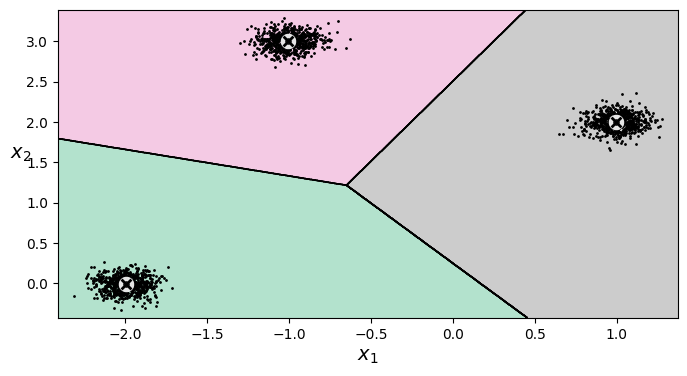

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Explicación de `kmeans.transform(X)`

Este método calcula las **distancias** de cada punto en los datos a todos los **centroides** de los clusters encontrados por el algoritmo K-Means.

---

#### Parámetros:

- **X**: Es el conjunto de datos que contiene los puntos que quieres transformar. Son los mismos datos que usamos antes para agrupar con K-Means.

---

#### Funcionamiento:

- **`kmeans.transform(X)`**: Esta función calcula la **distancia** entre cada punto de `X` y todos los **centroides** que el modelo K-Means encontró.

---

#### Resultado:

- Devuelve una **matriz de distancias**.
  - Cada fila corresponde a un punto de los datos en `X`.
  - Cada columna corresponde a un **cluster** (centroide).

---

#### Utilidad del método `transform`:

Este método es útil cuando necesitas:
- Medir **qué tan cerca o lejos** está un punto de cada uno de los **centroides**.


In [ ]:
kmeans.transform(X)

array([[3.7168585 , 2.31309621, 0.11501753],
       [3.15666765, 0.07126355, 2.30611576],
       [0.32978145, 3.38334354, 3.61618037],
       ...,
       [3.56561601, 2.27064396, 0.06775123],
       [0.03534451, 3.13729795, 3.57939512],
       [3.37073491, 0.22521081, 2.17071869]])

### Configuración del modelo de K-Means con inicialización `"k-means++"`

---

#### Parámetros principales:

- **`n_clusters=k`**: El número de clusters se basa en la variable `k`, que ya ha sido definida antes (puede ser cualquier número de clusters, por ejemplo, entre 2 y 10).
- **`init="k-means++"`**: Usa la estrategia **k-means++** para inicializar los centroides de manera más inteligente que con una inicialización aleatoria. Esto ayuda a que los clusters iniciales estén mejor distribuidos, lo que suele mejorar los resultados y la velocidad de convergencia.
- **`n_init=1`**: Solo se realiza una inicialización del modelo.
- **`algorithm="elkan"`**: Usa el algoritmo **Elkan**, que está optimizado para acelerar el cálculo de distancias en K-Means, lo que lo hace más rápido en ciertos casos, especialmente con muchos puntos de datos.
- **`max_iter=3`**: El algoritmo realizará hasta 3 iteraciones para ajustar los centroides. Después de colocar los centroides iniciales, K-Means ajustará sus posiciones un máximo de 3 veces para intentar encontrar la mejor ubicación.
- **`random_state=1`**: Al fijar la semilla aleatoria en 1, aseguramos que cada vez que ejecutemos este código obtengamos los mismos resultados.

---

### Definiciones adicionales de K-Means con variaciones mínimas:

Estas dos líneas son similares a la anterior, pero cambian el número de iteraciones:

- **`kmeans_iter2`**: Se configura con `max_iter=2`, es decir, solo permitirá 2 iteraciones de ajuste.
- **`kmeans_iter3`**: Permite un máximo de 3 iteraciones.

Estas diferencias permiten comparar cómo cambia el ajuste del modelo en función del número de iteraciones.

In [ ]:
kmeans_iter1 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="elkan", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', init='random', max_iter=3, n_clusters=3, n_init=1,
       random_state=1)

### Resumen General:

---

#### Variaciones en K-Means:

El código experimenta con diferentes configuraciones de K-Means, ajustando principalmente:

- El número de iteraciones (`max_iter`).
- El método de inicialización de los centroides (`random` o `k-means++`).
- El algoritmo que calcula las distancias (`full` o `elkan`).

---

#### Objetivo:

El objetivo de estas variaciones es observar cómo los cambios en las configuraciones afectan:

- La **calidad de los clusters**.
- El **tiempo de procesamiento**.

---

#### Diferencia entre algoritmos:

- **Lloyd's ("full")**: El algoritmo tradicional de K-Means.
- **Elkan**: Variante más eficiente en el cálculo de distancias, útil cuando trabajas con **grandes cantidades de datos** o **alta dimensionalidad**.


### Proceso Iterativo del Algoritmo K-Means

El gráfico en la imagen muestra cómo funciona el algoritmo K-Means de manera iterativa:

1. **Inicializa centroides aleatoriamente**.
2. **Asigna puntos a los centroides más cercanos**.
3. **Actualiza los centroides** basándose en el promedio de los puntos asignados a ese cluster
4. **Repite el proceso** hasta que los centroides ya no se muevan significativamente.


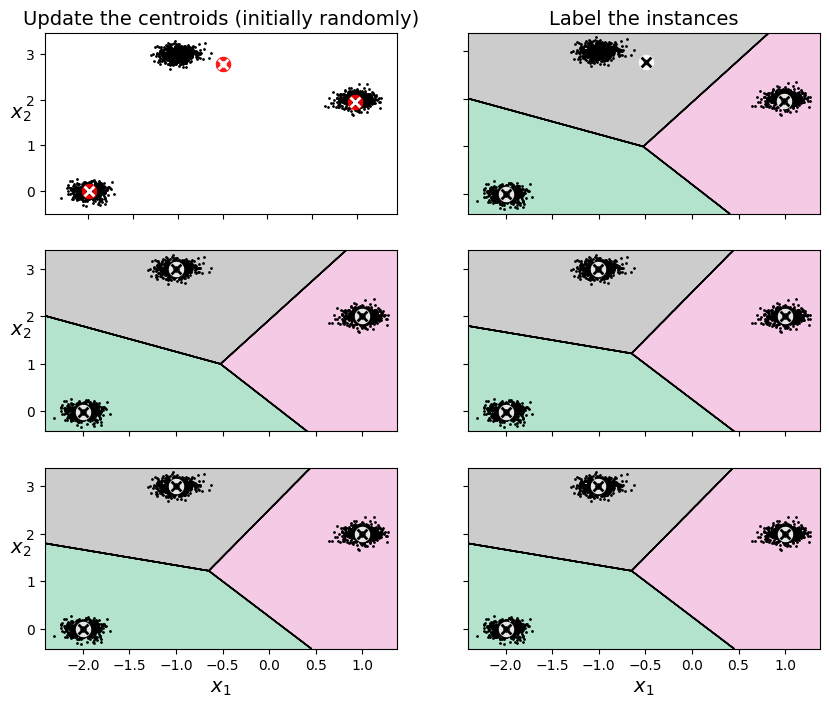

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

# Calcular el Silhouette Score
¿Qué es?
es una métrica que evalúa qué tan bien están agrupados los puntos dentro de sus respectivos clusters. Se utiliza para medir la calidad de un conjunto de clusters creados por un algoritmo como K-Means.

- **X**: Es el conjunto de datos que contiene los puntos que han sido agrupados. Es una matriz de datos donde cada fila es un punto y cada columna es una característica (por ejemplo, en un espacio bidimensional, X tiene 2 columnas).
  
- **kmeans.labels_**: Este atributo contiene las etiquetas (o clusters) asignadas a cada punto por el modelo K-Means. Cada punto en X tiene una etiqueta que indica a qué cluster pertenece. `labels_` es un atributo del objeto KMeans que se genera cuando el modelo ha sido entrenado (es decir, después de llamar a `fit` o `fit_predict`).
  
- **silhouette_score(X, kmeans.labels_)**: Esta función evalúa la calidad del agrupamiento calculando el Silhouette Score para cada punto del dataset. Devuelve el promedio de estos valores (el "Silhouette Score promedio").

## Donde:

- **a(i)**: Es la distancia promedio entre el punto i y todos los otros puntos del mismo cluster (cohesión).
  
- **b(i)**: Es la distancia promedio entre el punto i y los puntos del cluster más cercano al que no pertenece (separación).

## El valor del Silhouette Score está en el rango de -1 a 1:

- **1**: El punto está perfectamente asignado a su cluster.
  
- **0**: El punto está en la frontera entre dos clusters.
  
- **Valores negativos**: El punto podría estar mal asignado a su cluster, ya que está más cerca de otro cluster.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.9292120663460631


In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

# K-Means: Inicialización Aleatoria de Centroides

El código que proporcionaste muestra cómo el algoritmo K-Means puede producir soluciones diferentes dependiendo de la inicialización aleatoria de los centroides.

## Primera inicialización de K-Means (kmeans_rnd_init1):

- **n_clusters=k**: Se está usando el número de clusters **k**, que ya fue definido antes. En la gráfica, parece que se están utilizando 5 clusters.
  
- **init="random"**: Esto significa que los centroides iniciales se seleccionan aleatoriamente dentro del espacio de los datos.
  
- **n_init=1**: El algoritmo K-Means solo realizará una única inicialización (es decir, solo ejecutará una vez el proceso de asignación de centroides iniciales y no probará varias veces como lo haría por defecto con un valor mayor de **n_init**).
  
- **algorithm="elkan"**: Este es un algoritmo optimizado para K-Means que acelera el cálculo de las distancias entre los puntos y los centroides.
  
- **random_state=11**: Esto fija una semilla aleatoria para que el proceso sea reproducible. Cada vez que ejecutas este código con **random_state=11**, obtendrás los mismos resultados de agrupación.

## Segunda inicialización de K-Means (kmeans_rnd_init2):

Este bloque es casi idéntico al anterior, con una diferencia clave:

- **random_state=19**: Aquí usamos un valor diferente de semilla aleatoria (**19** en lugar de **11**). Esto cambia la forma en que se eligen los centroides iniciales, aunque el resto de los parámetros permanezca igual.

## Comparar las dos soluciones con la función `plot_clusterer_comparison`:

La función entrena ambos modelos y genera los gráficos para mostrar los resultados de cada inicialización aleatoria de los centroides.

# ¿Qué muestra esta comparación?

- **Dependencia de la inicialización**: La imagen te muestra claramente que el algoritmo K-Means es sensible a la inicialización de los centroides. Con diferentes valores de **random_state** (que cambian la forma en que se inicializan los centroides), el algoritmo puede generar diferentes agrupamientos incluso para los mismos datos.

- **Distintos centroides**: En "Solution 1" y "Solution 2", los centroides (las cruces blancas) están en posiciones diferentes, lo que significa que los clusters formados también son diferentes.


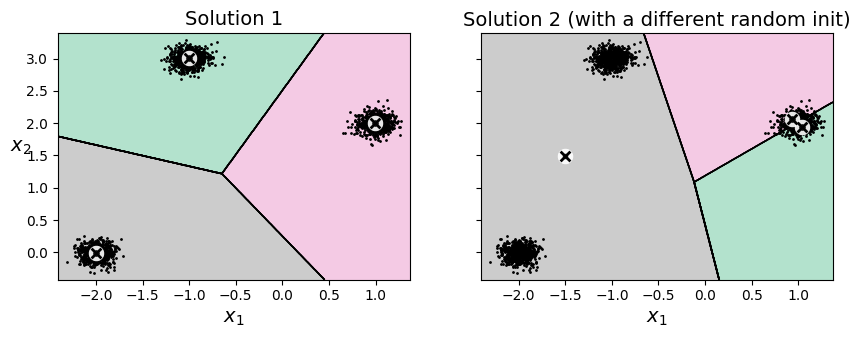

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,"Solution 1", "Solution 2 (with a different random init)")

plt.show()

# Ajuste del Modelo K-Means

Este código ajusta un modelo K-Means que intenta crear **k** clusters en los datos, ejecutando el proceso 10 veces con diferentes inicializaciones aleatorias de centroides. Luego, selecciona la mejor agrupación obtenida en esas 10 ejecuciones.

## ¿Por qué se hace esto?

Porque, como vimos en las gráficas anteriores, la inicialización aleatoria puede dar lugar a resultados muy diferentes. Al ejecutar el algoritmo 10 veces, K-Means selecciona la mejor solución (es decir, la solución que tiene la menor suma de distancias dentro de los clusters). Este enfoque ayuda a evitar que el algoritmo se quede atrapado en óptimos locales, mejorando la calidad de los clusters resultantes.

Usar **n_init=10** es una forma común de mejorar la calidad de las soluciones que produce K-Means, ya que reduce el riesgo de encontrar un agrupamiento de baja calidad debido a una mala inicialización aleatoria.


In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=k, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=3, n_init=10,
       random_state=11)

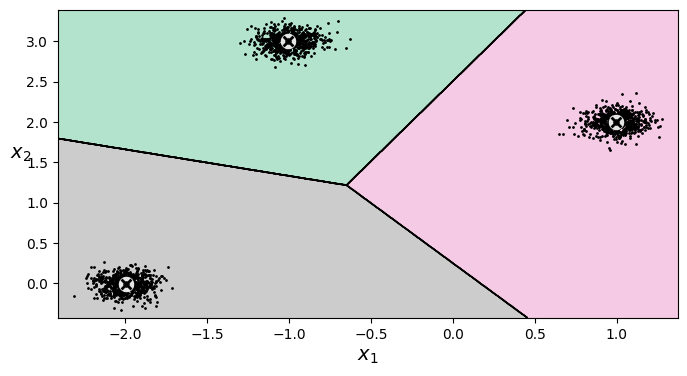

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

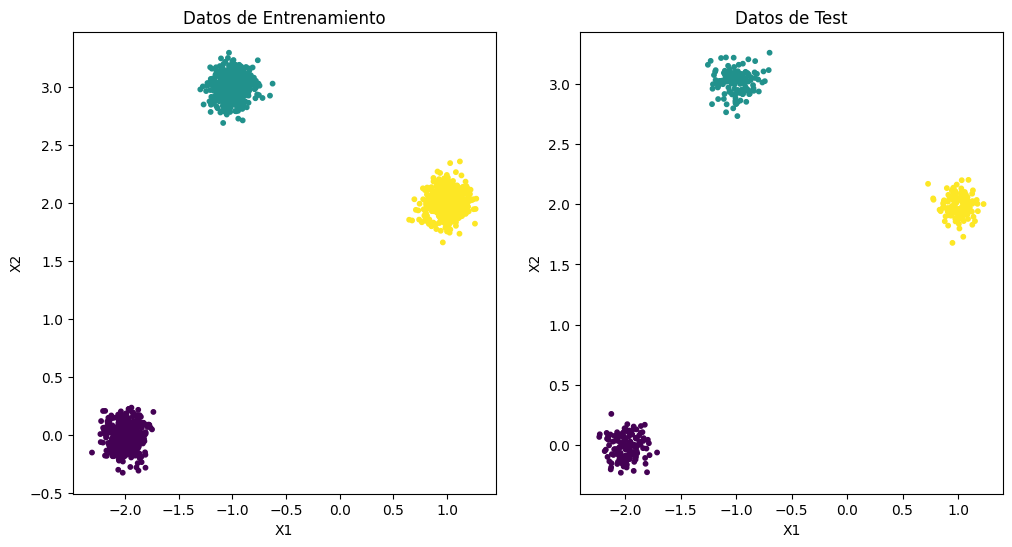

In [ ]:
from sklearn.model_selection import train_test_split
import copy

# Copiar el dataset creado (X e y)
X_copy = copy.deepcopy(X)
y_copy = copy.deepcopy(y)

# Dividir el dataset copiado en datos de entrenamiento y test (80% entrenamiento, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

# Visualización de la división
plt.figure(figsize=(12, 6))

# Datos de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=10)
plt.title("Datos de Entrenamiento")
plt.xlabel("X1")
plt.ylabel("X2")

# Datos de test
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=10)
plt.title("Datos de Test")
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()


# Función `load_next_batch(batch_size)`

Esta es una función que toma un parámetro de entrada llamado **batch_size**. Este parámetro especifica cuántos datos (o puntos) se van a seleccionar en cada llamada a la función.

## Detalles:

- **X**: Se refiere a un conjunto de datos que ya está definido.

- **np.random.choice(len(X), batch_size, replace=False)**:
  - **np.random.choice**: Es una función de NumPy que selecciona elementos aleatorios de un conjunto.
  - **len(X)**: Es el número total de puntos de datos en el conjunto **X**. Básicamente, estamos diciéndole a NumPy que elija puntos de datos de entre todos los disponibles en **X**.
  - **batch_size**: Es el número de puntos que queremos seleccionar. Este número se pasa como argumento cuando llamas a la función.
  - **replace=False**: Significa que no se permite la repetición. Cada punto de datos que se seleccione será único dentro del lote.

La función finalmente retorna un subconjunto de puntos de datos de tamaño **batch_size** tomados aleatoriamente del conjunto total **X**.


In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

# MiniBatchKMeans: Resumen y Funcionamiento

**MiniBatchKMeans**: Es una versión más eficiente de K-Means. En lugar de usar todo el conjunto de datos en cada iteración, solo toma pequeñas porciones (minibatches), lo que reduce el tiempo de cómputo y la memoria usada.

## Parámetros:

- **k = N**: El número de clusters que se quiere generar es **k**, y viene de la variable **N** definida previamente en el código.
  
- **n_init = 10**: Ejecutaremos el proceso de MiniBatchKMeans 10 veces con diferentes inicializaciones. Al final, seleccionaremos la mejor agrupación.
  
- **n_iterations = 1000**: Cada modelo se entrenará durante 1000 iteraciones. Esto significa que el algoritmo MiniBatchKMeans actualizará los centroides 1000 veces usando diferentes minibatches de datos.
  
- **batch_size = 100**: El tamaño del minibatch será de 100 puntos. En cada iteración, solo 100 puntos de los datos serán utilizados para actualizar los centroides.
  
- **init_size = 500**: El tamaño de los datos iniciales utilizados para la primera inicialización de centroides será de 500 puntos. Estos se seleccionarán aleatoriamente de los datos en la primera etapa del algoritmo.
  
- **evaluate_on_last_n_iters = 10**: Solo se evaluarán las últimas 10 iteraciones del algoritmo para seleccionar la mejor inicialización.

- **best_kmeans = None**: Inicializamos la variable que almacenará el mejor modelo de MiniBatchKMeans basado en la métrica de la inercia (la suma de las distancias de los puntos a sus centroides).

## Ciclo para ejecutar MiniBatchKMeans múltiples veces con diferentes inicializaciones:

1. **for init in range(n_init)**: Ejecutamos el proceso de MiniBatchKMeans **n_init** veces (en este caso, 10 veces), cada vez con una inicialización diferente.
  
2. **minibatch_kmeans = MiniBatchKMeans(...)**: Creamos una nueva instancia de MiniBatchKMeans en cada iteración. En cada caso, estamos ajustando **k** clusters con un tamaño de inicialización de 500 puntos (**init_size**) y un tamaño de minibatch de 100 puntos (**batch_size**).
  
3. **X_init = load_next_batch(init_size)**: Aquí utilizamos la función `load_next_batch` para obtener un conjunto inicial de datos de tamaño **init_size** (500 puntos). Estos datos serán utilizados para la inicialización de los centroides.
  
4. **minibatch_kmeans.partial_fit(X_init)**: Entrenamos el modelo MiniBatchKMeans usando este conjunto inicial de datos. `partial_fit` permite que MiniBatchKMeans ajuste los centroides con solo el subconjunto de datos que recibe (en este caso, **X_init**).

## Entrenamiento iterativo usando MiniBatches:

- **minibatch_kmeans.sum_inertia_ = 0**: Inicializamos una variable personalizada llamada **sum_inertia_** que vamos a usar para acumular la inercia (la métrica de calidad de los clusters) de las últimas iteraciones.
  
- **for iteration in range(n_iterations)**: Entrenamos el modelo MiniBatchKMeans durante 1000 iteraciones, ajustando los centroides con minibatches de datos en cada iteración.
  
- **X_batch = load_next_batch(batch_size)**: En cada iteración, obtenemos un nuevo minibatch de datos de tamaño **batch_size** (100 puntos) usando la función `load_next_batch`.
  
- **minibatch_kmeans.partial_fit(X_batch)**: Actualizamos el modelo MiniBatchKMeans con este minibatch de datos. `partial_fit` ajusta los centroides utilizando solo los puntos del minibatch.
  
- **if iteration >= n_iterations - evaluate_on_last_n_iters**: Este condicional asegura que solo acumulamos la inercia de las últimas 10 iteraciones, como se definió anteriormente en **evaluate_on_last_n_iters**.
  
- **minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_**: Acumulamos la inercia (medida de la calidad del clustering) durante las últimas iteraciones.

## Seleccionar el mejor modelo:

- **if (best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_)**: En cada iteración del ciclo de inicialización, comparamos la inercia acumulada de este modelo con la del mejor modelo anterior. Si este modelo tiene una inercia menor (es decir, los clusters están mejor formados), lo seleccionamos como el mejor modelo.
  
- **best_kmeans = minibatch_kmeans**: Si el nuevo modelo es mejor que el anterior, lo guardamos en **best_kmeans**.

## Resumen general:

Este código entrena un modelo MiniBatchKMeans varias veces (10 en este caso) con diferentes inicializaciones, utilizando minibatches de datos en cada iteración para actualizar los centroides. Después de completar el entrenamiento en cada inicialización, selecciona el mejor modelo basado en la inercia (una medida de la calidad del clustering). Este proceso es más eficiente que el K-Means tradicional, ya que solo utiliza pequeños subconjuntos de datos en cada iteración.


In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = N
n_init = 10
n_iterations = 1000
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size, batch_size=batch_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

# Evaluación de Iteraciones en MiniBatchKMeans

El ciclo **for** está iterando sobre las 1000 iteraciones totales que realizamos para ajustar los centroides de K-Means utilizando minibatches de datos. Sin embargo, no estamos evaluando todas las iteraciones, sino solo las últimas. Esto es porque queremos centrarnos en el comportamiento del algoritmo después de que haya tenido tiempo de estabilizar los clusters, lo que nos da una mejor evaluación de su rendimiento.

## Detalles de las Iteraciones:

- **iteration**: Es el número de la iteración actual del ciclo (el valor va de 0 a 999, ya que hay 1000 iteraciones).
  
- **n_iterations - evaluate_on_last_n_iters**:
  - **n_iterations**: Es el número total de iteraciones que va a realizar el ciclo (en este caso, 1000).
  - **evaluate_on_last_n_iters**: Es el número de iteraciones finales en las que se evaluará el rendimiento del modelo. En este caso, se evaluarán las últimas 10 iteraciones.

Entonces, \( n\_iterations - evaluate\_on\_last\_n\_iters \) es igual a \( 1000 - 10 = 990 \).

### Condición:

Esta condición pregunta si la iteración actual es mayor o igual a 990. Si lo es, eso significa que estamos en las últimas 10 iteraciones (de la iteración 990 a la 999).

## ¿Qué hace esta condición?

Solo permite que el código dentro del bloque **if** se ejecute durante las últimas 10 iteraciones del ciclo. Esto es importante porque queremos acumular la inercia (una métrica de la calidad del clustering) solo en esas últimas iteraciones.

## Acción que ocurre dentro del bloque:

- **minibatch_kmeans.inertia_**:
  - La inercia mide la suma de las distancias al cuadrado entre cada punto y su centroide. Cuanto menor es la inercia, más compactos y bien formados están los clusters.
  - Una inercia baja indica que los puntos dentro de los clusters están muy cerca de sus centroides, lo cual es un signo de un buen agrupamiento.

- **minibatch_kmeans.sum_inertia_**:
  - Esta es una variable que estamos usando para acumular la inercia de las últimas 10 iteraciones. Se inicializó en 0 antes del ciclo y se va incrementando en cada una de esas últimas iteraciones.

## ¿Por qué acumular la inercia en las últimas iteraciones?

- **Evaluación precisa al final del entrenamiento**: En muchos casos, las primeras iteraciones de MiniBatchKMeans pueden no ser representativas de la calidad final del agrupamiento, ya que los centroides todavía están ajustándose.
- Al evaluar solo las últimas iteraciones, podemos obtener una mejor idea de cómo se comporta el algoritmo una vez que ha convergido. Esto asegura que evaluamos la estabilidad de los clusters al final del proceso de entrenamiento, cuando es más probable que los clusters estén bien formados.

## Resumen:

Este bloque de código:
- Evalúa solo las últimas iteraciones del ciclo (en este caso, las últimas 10) para ver cómo está convergiendo el algoritmo MiniBatchKMeans.
- Acumula la inercia en esas últimas iteraciones para tener una medida de la calidad del clustering al final del proceso, cuando los clusters ya deberían haberse estabilizado.


In [ ]:
if iteration >= n_iterations - evaluate_on_last_n_iters:
    minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.9292120663460631

# Método `score()` en K-Means

El método **score()** de K-Means simplemente te da una forma de evaluar la calidad de los clusters: un valor menos negativo indica una mejor agrupación (los puntos están más cerca de sus centroides).

- **best_kmeans.score(X)** devolverá un valor como, por ejemplo, **-5000** si la inercia es 5000. Esto significa que la suma total de las distancias al cuadrado de los puntos a sus centroides es 5000.

## Inercia

Como mencioné antes, la **inercia** mide la suma de las distancias al cuadrado entre cada punto de datos y el centroide de su cluster.

- **Inercia baja**: Un valor más bajo de inercia significa que los puntos están, en promedio, más cerca de sus respectivos centroides. Esto sugiere que los clusters están bien formados.

- **Inercia alta**: Un valor más alto de inercia indica que los puntos están más dispersos dentro de sus clusters, lo que puede sugerir que los clusters no son tan compactos.


In [ ]:
best_kmeans.score(X)

-39.12101231366673

#ENCONTRAR NUMERO OPTIMO DE GRUPOS

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.9292120663460631

# Cálculo de K-Means para Diferentes Valores de k

- **range(2, 11)**: Estamos probando diferentes valores de **k** entre 2 y 10. Esto significa que calcularemos K-Means para cada uno de estos valores de **k** (2 clusters, 3 clusters, ..., 10 clusters).

- **KMeans(n_clusters=k, random_state=42).fit(X)**: Para cada valor de **k**, estamos ajustando un modelo K-Means en el conjunto de datos **X**.

- **kmeans_per_k**: Esto almacena una lista de todos los modelos K-Means ajustados, uno para cada valor de **k** (de 2 a 10).

## Calcular el Silhouette Score para Cada Valor de k

- **silhouette_score(X, model.labels_)**: Calcula el Silhouette Score para cada modelo K-Means ajustado en **kmeans_per_k**.
  
- **model.labels_**: Son las etiquetas asignadas por el modelo K-Means para los puntos de datos en **X**. Cada punto de datos tiene una etiqueta que indica a qué cluster pertenece.
  
- **silhouette_score(X, model.labels_)**: Calcula el Silhouette Score para los datos agrupados. Como ya vimos antes, el Silhouette Score mide qué tan bien se agrupan los puntos en sus respectivos clusters y qué tan bien separados están los clusters entre sí.

- **silhouette_scores**: Es una lista que almacena los Silhouette Scores calculados para cada modelo K-Means (uno por cada valor de **k**).

## ¿Cómo Interpretar el Gráfico?

- **Pico máximo**: El número de clusters **k** donde el Silhouette Score es más alto generalmente es una buena indicación del número óptimo de clusters.

### Valores de k bajos o altos:

- **Valores bajos de k (cercanos a 2)**: Si tienes muy pocos clusters, los puntos dentro de los clusters pueden estar demasiado dispersos, lo que reduce el Silhouette Score.

- **Valores altos de k**: Si el valor de **k** es demasiado alto, puede que tengas muchos clusters pequeños, lo que también podría reducir el Silhouette Score porque los clusters no están bien definidos o son muy pequeños.


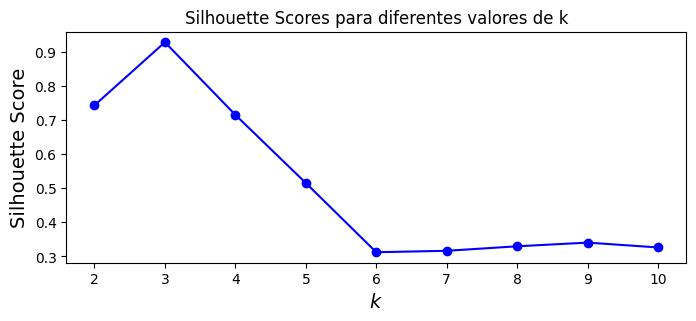

In [ ]:
# Calcular K-Means para valores de k de 2 a 10
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, 11)]

# Calcular el Silhouette Score para cada K-Means
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

# Graficar los Silhouette Scores
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Scores para diferentes valores de k")
plt.show()

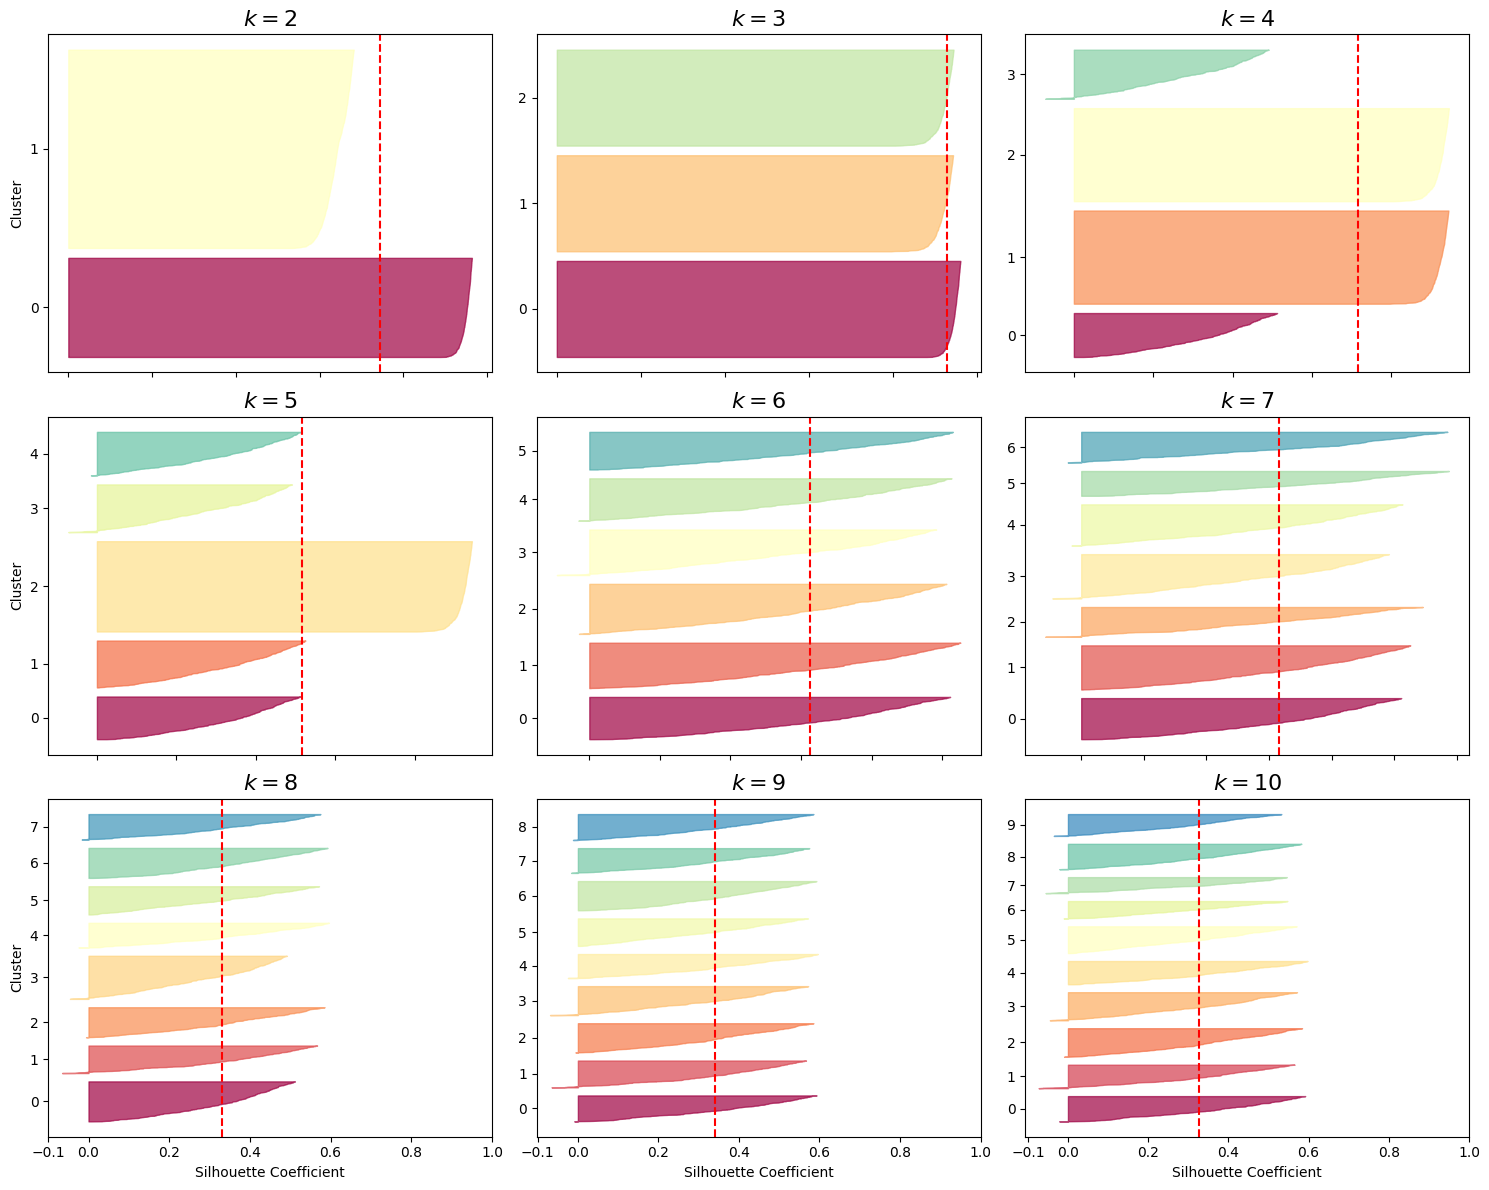

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Gráfico de silueta dinámico para k = 2 hasta k = 10
plt.figure(figsize=(15, 12))

# Establecer número de filas y columnas para los subplots
n_rows = 3
n_cols = 3

for idx, k in enumerate(range(2, 11), start=1):
    plt.subplot(n_rows, n_cols, idx)

    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 5, 8):
        plt.ylabel("Cluster")

    if k in (8, 9, 10):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()